# Problema 1

Realice un notebook en el se programen y expliquen los siguientes algoritmos de integraciponn de ecuaciones diferenciales:

    a) Integración por Método de Euler
    b) Integración por serie de Taylor de 2o Orden
    c) Integración por Método de Runge-Kutta de 2o Orden
    d) Integración por Método de Runge-Kutta de 4o Orden
    
Verifique el funcionamiento de sus integradores encontrando la solución de la siguiente ecuación diferencial para $x(t)$:

$$\ddot{x}+0.5\dot{x}+sinx=e^{-t}sin(3t),$$
donde $x(0)=0\ $ y $\ \dot{x}(0)=1$.

### a)Método de Euler

Como sabemos, la derivada de una función $y(x)=f(x)$ se define como: $$f'(x) \equiv \lim_{h\to0} \frac{f(x+h)-f(x)}{h}$$. La derivada puede aproximarse al considerar un valor suficientemente pequeño, pero finito, de h de modo que $f'(x) \approx \frac{f(x+h)-f(x)}{h}$. Entonces, $f(x+h)\approx f(x)+h\ f'(x) $. Entonces, dada una ecuación diferencial $f'(f,x)$ y condición inicial $f(x_0)=0$, que cumple con el teorema de existencia y unicidad en un intervalo $[x_a,x_b]$ con $x_a\leq x_0 \leq x_b$, podemos hallar $f(x)$ de manera aproximada en este intervalo. Típicamente nos interesa hacer la integración en el sentido de x positivas (predecir en el tiempo el comportamiento del sistema). 

Para esto, dividimos el intervalo $[x_0,x_b]$ en subintervalos iguales de ancho $h$ de modo que se tienen una malla regular en el dominio dada por $x_0,x_1,...,x_n,...,x_b$ donde $x_{n+1}=x_n+h$. Con esto, a cada punto $x_n$ le corresponde un valor de $f$ que denotaremos como $y_n\equiv f(x_n)$ Entonces, el método de Euler consiste en hallar el valor de la derivada de manera iterada mediante: 

$$y_{n+1}\equiv f(x_{n+1})=f(x_n)+h\ f'(x_n,f(x_n)\ )$$.

Ahora, para una ecuación diferencial de orden $n$ de la forma $y^{(n)}(t)=g(x,y,\dot{y},\ddot{y},...,y^{(n-1)})$ se puede realizar la siguiente serie de cambios de variable de modo que $y_1=y(x)$ (la solución de la ecuación que buscaremos), $y_2=y'(x),...,y_n=y^{(n-1)}(x)$. De este modo $\dot{y_1} = y_2(x),\dot{y_2}=y_3(x),...,\dot{y_{n}}=y_{n-1}(x)$ y, además,
$$y^{(n)}(x)=g(x,y_1,y_2,...,y_n)$$.

En el caso general se tiene un sistema de ecuaciones de la forma:

$$ \begin{cases} \dot{y_1} & = & g_1(x,y_1,y_2,...,y_n) \\ \dot{y_2} & = & g_2(x,y_1,y_2,...,y_n) \\ \quad & \vdots & \quad \\ \dot{y_n} & = & g_n(x,y_1,y_2,...,y_n) \end{cases}$$

Entonces, definimos $\vec{y}=(y_1,y_2,...,y_n)$ y $\vec{g}=(g_1,g_2,...,g_n)$, donde $g_i=g_i(x,\vec{y})\ $ para $\ i\in\{1,2,...,n\}$. Como $\vec{y}=\vec{f}(x)$ el sistema se puede escribir como:

$$\dot{\vec{y}}(x)=\vec{g}(x,\vec{y})=\vec{g}(x,\vec{f}(x))$$

De este modo se puede realizar integración con el método de Euler con:

$$\vec{y_{n+1}}=\vec{y}(x_n)+h\ \dot{\vec{y_n}}=\vec{f}(x_n)+h\ \dot{\vec{g}}(x_n,\vec{f}(x_n))$$

A continuación se presenta el código para un algoritmo del caso general. Cabe notar que se hace un cambio de notación. En vez de $y(x)$ se utiliza $x(t)$.

In [1]:
import numpy as np

In [2]:
def int_euler (funcion,x0,tlist,h=0.1):
    """
    Funcion de Integracion por el Metodo de Euler. Sus argumentos son: la funcion,el valor de la funcion al tiempo inicial x0,
    una lista con el tiempo inicial y el final tlist=[ti,tf] y el paso de integracion como argumento opcional. 
    Regresa los tiempos y sus respectivos valores de la funcion como una tupla de arrays t,x. 
    Cabe notar que tanto funcion como x0 pueden tomar valores vectoriales, los cuales se representan por arrays.
    Tambien, la funcion debe tener ordenados los parámetros de la forma f(t,x).
    """
    if (tlist[1]-tlist[0])<10.0*h:   #cambia el valor de h para garantizar que se hagan almenos 10 iteraciones
        h=(tlist[1]-tlist[0])*0.1
    tiempos=np.arange(tlist[0],tlist[1],h) #regresa un array
    x = np.zeros((len(tiempos),len(x0)))#regresa otro array del ancho de la dimension de x0 y el largo del array de tiempos)
    x[0,:] = x0 #x[tiempo,coordenada],:==todas las coordenadas
    for i in xrange(0,len(tiempos)-1):
        x[i+1,:]=x[i,:]+h*funcion(tiempos[i],x[i,:])    
    return tiempos,x 
#regresa una tupla, que la hace inmutable a diferencia de una lista y que, a diferencia de un array, 
#cada entrada puede ser de distinto tipo (heterogéneas)

### b)Integración con Serie de Taylor a 2o Orden

En el método de Euler se utiliza la aproximación $f(x+h)\approx f(x)+h\ f'(x)\ = f(x)+h\ g(x,f(x))\ $, que es la expansión de Taylor de $f$ alrededor de $x$ a primer orden de $h$ para estimar el valor de la función en $x+h$ dado su valor en $x$. Para aumentar la presición del método se utiliza la expansión a segundo orden en h dada por:

$$f(x+h)\approx f(x)+h\ f'(x)+\ \frac{h^2}{2}\ f''(x)\ = f(x)+h\ g(x,f(x))+\ \frac{h^2}{2}\ \frac{d}{dx}\ g(x,f(x)).$$

Notemos que: $\frac{d}{dx}g(x,f(x))=\frac{\partial g}{\partial x}+\frac{\partial g}{\partial f}\frac{\partial f}{\partial x} = \frac{\partial g}{\partial x}+\frac{\partial g}{\partial y}g =(\frac{\partial g}{\partial x},\frac{\partial g}{\partial y})\cdot(1,g) =\vec{\nabla}{g}\cdot(1,g)$

Con esto, se puede integrar la ecuación digerencial al calcular de manera iterada $$y_{n+1}=f(x_n+h)=f(x_n)+h\ g(x_n,f(x_n)\ )+\frac{h^2}{2}(\frac{\partial g}{\partial x}+\frac{\partial g}{\partial f}g)\Big|_{x_n\ ,\ f(x_n)}$$



En el caso de una ecuación de orden $n$, haciendo exactamente los mismos cambios de variable y definiciones que se realizaron en el caso del método de Euler, se obtiene de manera general que:

$$\dot{\vec{y}}(x)=\vec{g}(x,\vec{y})=\vec{g}(x,\vec{f}(x))\quad \mbox{(la misma ecuación).}$$

Sin embargo,en este caso el proceso iterativo para obtener la solución esta dado por:

$$\vec{y}_{n+1}=\vec{f}(x_n+h)=\vec{f}(x_n)+h\ \vec{g}(x_n,\vec{f}(x_n)\ )+\frac{h^2}{2}\textbf{J}_\vec{g}\cdot(1,\vec{g})\Big|_{x_n\ ,\ f(x_n)},$$

puesto que: $\frac{d}{dx}\vec{g}(x,\vec{f}(x))=\frac{\partial \vec{g}}{\partial x}+\sum\limits_{i=1}^n\frac{\partial \vec{g}}{\partial f_i}\frac{\partial f_i}{\partial x} = \frac{\partial \vec{g}}{\partial x}+\sum\limits_{i=1}^n\frac{\partial \vec{g}}{\partial y_i}g_i  =\textbf{J}_\vec{g}\cdot(1,\vec{g})$, donde $\textbf{J}_\vec{g}$ es la matriz Jacobiana de $\vec{g}$.

Como se observa, para realizar con este método y otros de orden superior se deben conocer las múltiples derivadas de la función $\vec{g}$ por lo que puede resultar inconveniente realizar dichos calculos.

A continuación se presenta el código para un algoritmo del caso general. Al igual que antes, en vez de $y(x)$ se utiliza $x(t)$.

In [3]:
def int_ord2(funcion,jac,x0,tlist,h=0.1):
    """
    Funcion de Integracion por Serie de Taylor a 2o orden. Sus argumentos son: la funcion de la ecuacion diferencial,
    el jacobiano de dicha funcion jac, el valor de la funcion al tiempo inicial x0,una lista con el tiempo inicial y el final
    tlist=[ti,tf] y el paso de integracion como argumento opcional. 
    Regresa los tiempos y sus respectivos valores de la funcion como una tupla de arrays t,x. 
    Cabe notar que la funcion, el jacobiano y x0 pueden tomar valores vectoriales, los cuales se representan por arrays.
    El jacobiano,al evaluarlo en (t,x) da una matrix constante de tipo array
    Tambien, la funcion debe tener ordenados los parámetros de la forma g(t,x).
    """
    if (tlist[1]-tlist[0])<10.0*h:   #cambia el valor de h para garantizar que se hagan almenos 10 iteraciones
        h=(tlist[1]-tlist[0])*0.1
    tiempos=np.arange(tlist[0],tlist[1],h) #regresa un array
    x=np.zeros((len(tiempos),len(x0))) #regresa otro array con el ancho de la dimension de x0 y el largo del array de tiempos
    x[0,:]=x0 #x[tiempo,coordenada], :==todas las coordenadas
    for i in xrange(0,len(tiempos)-1):
        vec=np.concatenate((np.array([1.]),funcion(tiempos[i],x[i,:])))#concatena los arrays de 1 y g(t,x) da (1,g)
        x[i+1,:]=x[i,:]+h*funcion(tiempos[i],x[i,:])+0.5*h*h*np.dot(jac(tiempos[i],x[i,:]),vec) #J*(1,g)
    return tiempos,x 
#regresa una tupla, que la hace inmutable a diferencia de una lista y que, a diferencia de un array, 
#cada entrada puede ser de distinto tipo (heterogéneas)

### c)Método de Runge-Kutta de Orden 2

A continuación se presenta el código para un algoritmo del caso general. Al igual que antes, en vez de $y(x)$ se utiliza $x(t)$.

In [4]:
def int_rk2(funcion,x0,tlist,h=0.1):
    """
    Funcion de Integracion por el Metodo de Runge-Kutta a 2o orden. Sus argumentos son: la funcion de la ecuacion diferencial,
    el valor de la funcion al tiempo inicial x0,una lista con el tiempo inicial y el final tlist=[ti,tf] y 
    el paso de integracion como argumento opcional. 
    Regresa los tiempos y sus respectivos valores de la funcion como una tupla de arrays t,x. 
    Cabe notar que la funcion, el jacobiano y x0 pueden tomar valores vectoriales, los cuales se representan por arrays.
    Tambien, la funcion debe tener ordenados los parámetros de la forma g(t,x).
    """
    if (tlist[1]-tlist[0])<10.0*h:   #cambia el valor de h para garantizar que se hagan almenos 10 iteraciones
        h=(tlist[1]-tlist[0])*0.1
    tiempos=np.arange(tlist[0],tlist[1],h) #regresa un array
    x = np.zeros((len(tiempos),len(x0)))#regresa otro array del ancho de la dimension de x0 y el largo del array de tiempos)
    x[0,:] = x0 #x[tiempo,coordenada],:==todas las coordenadas
    for i in xrange(0,len(tiempos)-1):
        x[i+1,:]=x[i,:]+h*funcion(tiempos[i]+0.5*h,x[i,:]+0.5*h*funcion(tiempos[i],x[i,:]))    
    return tiempos,x 
#regresa una tupla, que la hace inmutable a diferencia de una lista y que, a diferencia de un array, 
#cada entrada puede ser de distinto tipo (heterogéneas)

### d)Método de Runge-Kutta de Orden 4

In [36]:
def int_rk4(funcion,x0,tlist,h=0.1):
    """
    Funcion de Integracion por el Metodo de Runge-Kutta a 4o orden. Sus argumentos son: la funcion de la ecuacion diferencial,
    el valor de la funcion al tiempo inicial x0,una lista con el tiempo inicial y el final tlist=[ti,tf] y 
    el paso de integracion como argumento opcional. 
    Regresa los tiempos y sus respectivos valores de la funcion como una tupla de arrays t,x. 
    Cabe notar que la funcion, el jacobiano y x0 pueden tomar valores vectoriales, los cuales se representan por arrays.
    Tambien, la funcion debe tener ordenados los parámetros de la forma g(t,x).
    """
    if (tlist[1]-tlist[0])<10.0*h:   #cambia el valor de h para garantizar que se hagan almenos 10 iteraciones
        h=(tlist[1]-tlist[0])*0.1
    tiempos=np.arange(tlist[0],tlist[1],h) #regresa un array
    x = np.zeros((len(tiempos),len(x0)))#regresa otro array del ancho de la dimension de x0 y el largo del array de tiempos)
    x[0,:] = x0 #x[tiempo,coordenada],:==todas las coordenadas
    for i in xrange(0,len(tiempos)-1):
        k1=funcion(tiempos[i],x[i,:])
        k2=funcion(tiempos[i]+0.5*h,x[i,:]+0.5*h*k1)
        k3=funcion(tiempos[i]+0.5*h,x[i,:]+0.5*h*k2)
        k4=funcion(tiempos[i]+h,x[i,:]+h*k3)
        x[i+1,:]=x[i,:]+(1/6.0)*h*(k1+2*k2+2*k3+k4)    
    return tiempos,x 
#regresa una tupla, que la hace inmutable a diferencia de una lista y que, a diferencia de un array, 
#cada entrada puede ser de distinto tipo (heterogéneas)

### Comprobación de los Métodos de Integración 

Queremos hallar la solución de la ecuación diferencial para $x(t)$ dada por:

$$\ddot{x}+0.5\dot{x}+sinx=e^{-t}sin(3t),\quad \mbox{i.e} \quad $$
donde $x(0)=0\ $ y $\ \dot{x}(0)=1$.

Para esto hacemos el cambio de variable $\begin{cases}x_1=x(t) \\x_2=\dot{x}(t) \end{cases} \Rightarrow \dot{x_2}=\ddot{x}(t)$. Entonces, se tiene que $\begin{cases}\dot{x_1}=x_2 \\ \dot{x_2}=e^{-t}sin(3t)-0.5x_2-sinx_1 \end{cases}$

Por tanto, el sistema se puede escribir como $\dot{\vec{x}}=\vec{g}(t,\vec{x})$, con $\vec{x}=(x_1,x_2)$ y $\vec{g}=(x_2,e^{-t}sin(3t)-0.5x_2-sinx_1)$.

Además, la matriz jacobiana de la función $g$ esta dada por:
 $$\textbf{J}_\vec{g}=\begin{pmatrix} \frac{\partial g_1}{\partial t} & \frac{\partial g_1}{\partial x_1} & \frac{\partial g_1}{\partial x_2}\\ \frac{\partial g_2}{\partial t} & \frac{\partial g_2}{\partial x_1} & \frac{\partial g_2}{\partial x_2} \end{pmatrix}=\begin{pmatrix} 0 & 0 & 1 \\ 3e^{-t}cos(3t)-e^{-t}sin(3t) & -cosx_1 & -0.5 \end{pmatrix}$$

A continuación programamos la función $g$ con su jacobiano correspondiente y graficamos las soluciones de cada método de integración.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def g(t,x):
    return np.array([x[1],np.exp(-t)*np.sin(3*t)-0.5*x[1]-np.sin(x[0])])

def jacg(t,x):
    return np.array([[0,0,1],[-np.exp(-t)*np.sin(3*t) + 3*np.exp(-t)*np.cos(3*t),-np.cos(x[0]),-0.5]])

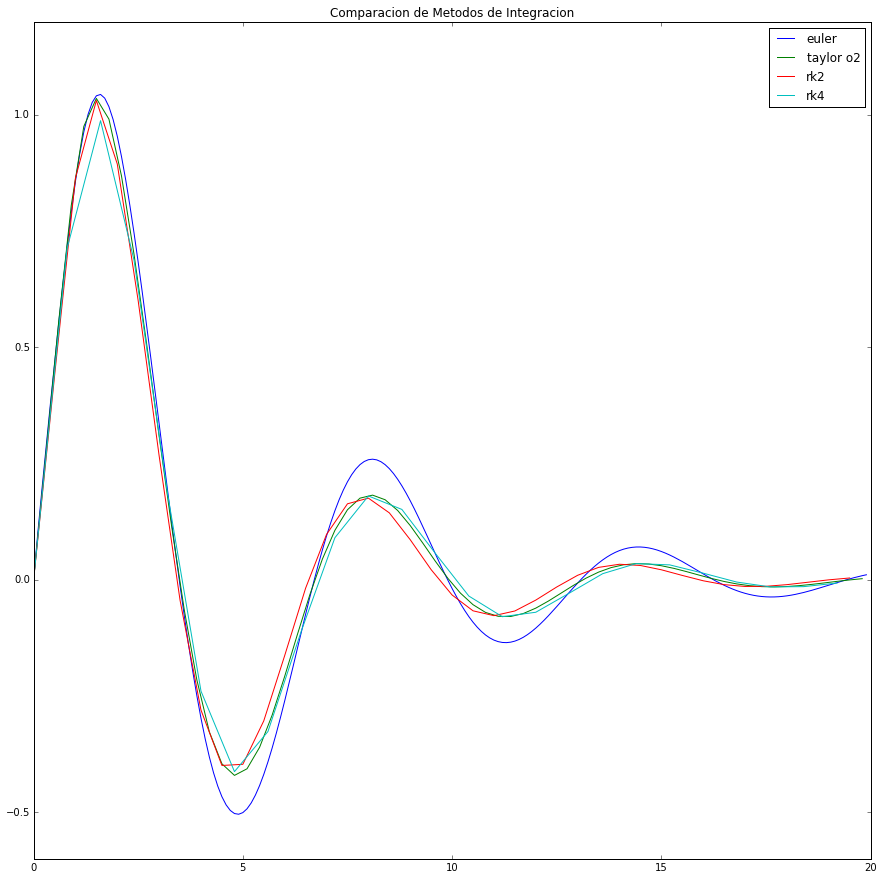

In [8]:
x0=[0,1]
tlist=[0,20]
t_eu,x_eu=int_euler(g,x0,tlist,h=0.1)
t_o2,x_o2=int_ord2(g,jacg,x0,tlist,h=0.3)
t_rk2,x_rk2=int_rk2(g,x0,tlist,h=0.5)
t_rk4,x_rk4=int_rk4(g,x0,tlist,h=0.8)

plt.figure(figsize=(15,15))
plt.plot(t_eu,x_eu[:,0],label="euler")
plt.plot(t_o2,x_o2[:,0],label="taylor o2")
plt.plot(t_rk2,x_rk2[:,0],label="rk2")
plt.plot(t_rk4,x_rk4[:,0],label="rk4")
plt.legend()
plt.title('Comparacion de Metodos de Integracion')
plt.show()

# Problema 2

Utilizando los integradores anteriores encuentre el mejor paso de integración para la siguiente ecuación:

$$\dddot{y}+\ddot{y}^2-3\dot{y}^3+cos^2y=e^{-t}sin(3t)$$

con condiciones iniciales $\ddot{y}(1)=1,\ \dot{y}(1)=2\ y(1)=1$. En particular, encuentre lo que sucede en los intervalos $t\in[1,2]\ $ y $\ t\in[2,2.1]$.

Al igual que antes hacemos los siguientes cambios de variable: 

$\begin{cases}y_1=y(t) \\y_2=\dot{y}(t)\\y_3=\ddot{y}(t) \end{cases} \Rightarrow \begin{cases}\dot{y_2}=\ddot{y}(t) \\ \dot{y_3}=\dddot{y}(t) \end{cases}$. Entonces, se tiene el siguiente sistema $\begin{cases}\dot{y_1}=y_2 \\ \dot{y_2}=y_3\\ \dot{y_3}=e^{-t}sin(3t)-cos^2y_1+3y_2^3-y_3^2 \end{cases}$

Por tanto, el sistema se puede escribir como $\dot{\vec{y}}=\vec{g}(t,\vec{y})$, con $\vec{y}=(y_1,y_2,y_3)$ y $\vec{g}=(y_2,y_3,e^{-t}sin(3t)-cos^2y_1+3y_2^3-y_3^2)$.

Con los cambios de variable, la condición inicial resulta ser $y0=(y_1(1),y_2(1),y_3(1))=(1,2,1)$ en $t=1$

Además, la matriz jacobiana de la función $g$ esta dada por:
 $$\textbf{J}_\vec{g}=\begin{pmatrix} \frac{\partial g_1}{\partial t} & \frac{\partial g_1}{\partial y_1} & \frac{\partial g_1}{\partial y_2} & \frac{\partial g_1}{\partial y_3}\\ \frac{\partial g_2}{\partial t} & \frac{\partial g_2}{\partial y_1} & \frac{\partial g_2}{\partial y_2} & \frac{\partial g_2}{\partial y_3} \\ \frac{\partial g_3}{\partial t} & \frac{\partial g_3}{\partial y_1} & \frac{\partial g_3}{\partial y_2} & \frac{\partial g_3}{\partial y_3} \end{pmatrix} =\begin{pmatrix} 0& 0 & 1 & 0 \\0 & 0 & 0 & 1 \\ 3e^{-t}cos(3t)-e^{-t}sin(3t) & 2cosy_1 siny_1 & 9y_2^2 & -2y_3\end{pmatrix}$$

A continuación programamos el la función $g$ con su jacobiano correspondiente y graficamos las soluciones de cada método de integración.

In [9]:
def fun(t,y): #y=(y1,y2,y3)
    return np.array([y[1],y[2],np.exp(-t)*np.sin(3*t)-np.cos(y[0])**2+3*y[1]**3-y[2]**2])

def jacfun(t,y):
    a0=-np.exp(-t)*np.sin(3*t) + 3*np.exp(-t)*np.cos(3*t)
    a1=2*np.cos(y[0])*np.sin(y[0])
    a2=9*y[1]**2
    a3=-2*y[2]
    return np.array([[0,0,1,0],[0,0,0,1],[a0,a1,a2,a3]])

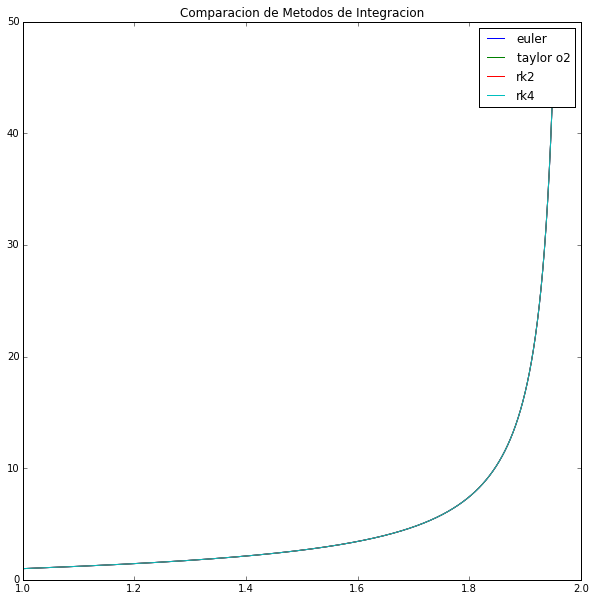

In [10]:
y0=[1,2,1]
tlist=[1,1.952] #1.98
h=0.000005
t_eu,x_eu=int_euler(fun,y0,tlist,h)
t_o2,x_o2=int_ord2(fun,jacfun,y0,tlist,h)
t_rk2,x_rk2=int_rk2(fun,y0,tlist,h)
t_rk4,x_rk4=int_rk4(fun,y0,tlist,h)

plt.figure(figsize=(10,10))
plt.plot(t_eu,x_eu[:,0],label="euler")
plt.plot(t_o2,x_o2[:,0],label="taylor o2")
plt.plot(t_rk2,x_rk2[:,0],label="rk2")
plt.plot(t_rk4,x_rk4[:,0],label="rk4")
plt.legend()
plt.title('Comparacion de Metodos de Integracion')
plt.show()

De la gráfica anterior se observa que la ecuación diferencial diverge alrededor de $t=1.952$. Los cuatro métodos tienen el mismo comportamiento y, además, conforme se va aumentando el valor del tiempo final se requiere reducir en gran medida el paso de integración. Por esta razón vemos que la máquina sólo puede realizar la integracións hasta ese punto con el paso de $h=0.000005$. Entonces, después de este punto la solución del sistema es desconocida puesto que se requeriría utilizar una condición inicial distinta que nos permitiera conocer el comportamiento de la función más allá de $t=1.952$ pero eso constituiría una solución diferente al problema.

# Problema 3

Modifique las funciones integradoras en el problema 1 de tal manera que se puedan pasar argumentos
opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parámetros
al momento de hacer la integración.  Una vez hecho esto, obtenga la soluciónn de la siguiente ecuación
diferencial:

$$\ddot{x}+\frac{1}{10}\dot{x}+4sinx=\frac{1}{2}sin(\omega t)$$

con las condiciones iniciales $\dot{x}(0)=1\ $ y $\ x(0)=0\ $ y para $\omega\in \{1,1.1,1.2,1.3,...,2.9,3\}$. Realice las gráficas de algunas soluciones que representen el comportamiento de la solución en función de $\omega$ y explique su resultado.

Para resolver la ecuación se requiere hallar $x(t)$. Para esto hacemos una serie de cambios de variable como se hizo anteriormente:

Para esto hacemos el cambio de variable $\begin{cases}x_1=x(t) \\x_2=\dot{x}(t) \end{cases} \Rightarrow \dot{x_2}=\ddot{x}(t)$. Entonces, se tiene que $\begin{cases}\dot{x_1}=x_2 \\ \dot{x_2}=\frac{1}{2}sin(\omega t)-0.1x_2-4sinx_1 \end{cases}$

Con esto, la condición inicial esta dada por $x_1=0,x_2=1$.

Por tanto, el sistema se puede escribir como $\dot{\vec{x}}=\vec{g}(t,\vec{x})$, con $\vec{x}=(x_1,x_2)$ y $\vec{g}=(x_2,\frac{1}{2}sin(\omega t)-0.1x_2-4sinx_1)$.

Además, la matriz jacobiana de la función $g$ esta dada por:
 $$\textbf{J}_\vec{g}=\begin{pmatrix} \frac{\partial g_1}{\partial t} & \frac{\partial g_1}{\partial x_1} & \frac{\partial g_1}{\partial x_2}\\ \frac{\partial g_2}{\partial t} & \frac{\partial g_2}{\partial x_1} & \frac{\partial g_2}{\partial x_2} \end{pmatrix}=\begin{pmatrix} 0 & 0 & 1 \\ \frac{\omega}{2}cos(\omega t) & -4cosx_1 & -0.1 \end{pmatrix}$$

La función $\vec{g}$ sólo tiene dependencias en $t$ y en $\vec{x}$ pues consideramos a $\omega$ como un parametro constante en el proceso de integración. Lo que queremos hacer ahora es realizar varias integraciones cambiando el valor de $\omega$ para $\omega\in \{1,1.1,1.2,1.3,...,2.9,3\}$. Primero definimos las funciones que corresponden a la ecuación diferencial.

In [11]:
def foo(t,x,w): #x=(x1,x2)
    return np.array([x[1],0.5*np.sin(w*t)-0.1*x[1]-4*np.cos(x[0])])

def jacfoo(t,x,w):
    a0=0.5*w*np.cos(w*t)
    a1=-4*np.cos(x[0])
    a2=-0.1
    return np.array([[0,0,1],[a0,a1,a2]])

Ahora modificaremos los métodos de integración. Nos basta con añadirle un argumento adicional al método y hacer que éste se lo pase a la función de la ecuación diferencial. 

**Método de Euler**

In [12]:
def arg_euler (funcion,x0,tlist,args=0,h=0.1):
    """
    Funcion de Integracion por el Metodo de Euler. Sus argumentos son: la funcion,el valor de la funcion al tiempo inicial x0,
    una lista con el tiempo inicial y el final tlist=[ti,tf] y el paso de integracion como argumento opcional.
    Puede tener una lista de parametros opcionales args que se pasan a la funcion de la ecuacion diferencial. 
    Regresa los tiempos y sus respectivos valores de la funcion como una tupla de arrays t,x. 
    Cabe notar que tanto funcion como x0 pueden tomar valores vectoriales, los cuales se representan por arrays.
    Tambien, la funcion debe tener ordenados los parámetros de la forma f(t,x).
    """
    if (tlist[1]-tlist[0])<10.0*h:   #cambia el valor de h para garantizar que se hagan almenos 10 iteraciones
        h=(tlist[1]-tlist[0])*0.1
    tiempos=np.arange(tlist[0],tlist[1],h) #regresa un array
    x = np.zeros((len(tiempos),len(x0)))#regresa otro array del ancho de la dimension de x0 y el largo del array de tiempos)
    x[0,:] = x0 #x[tiempo,coordenada],:==todas las coordenadas
    if args==0: #no hay argumentos opcionales dados    
        for i in xrange(0,len(tiempos)-1):
            x[i+1,:]=x[i,:]+h*funcion(tiempos[i],x[i,:])
    else:        
        for i in xrange(0,len(tiempos)-1):
            x[i+1,:]=x[i,:]+h*funcion(tiempos[i],x[i,:],args)    
    return tiempos,x 
#regresa una tupla, que la hace inmutable a diferencia de una lista y que, a diferencia de un array, 
#cada entrada puede ser de distinto tipo (heterogéneas)

**Integrador por Taylor de 2o Orden**

In [13]:
def arg_ord2(funcion,jac,x0,tlist,args=0,h=0.1):
    """
    Funcion de Integracion por Serie de Taylor a 2o orden. Sus argumentos son: la funcion de la ecuacion diferencial,
    el jacobiano de dicha funcion jac, el valor de la funcion al tiempo inicial x0,una lista con el tiempo inicial y el final
    tlist=[ti,tf] y el paso de integracion como argumento opcional. 
    Puede tener una lista de parametros opcionales args que se pasan a la funcion de la ecuacion diferencial.
    Regresa los tiempos y sus respectivos valores de la funcion como una tupla de arrays t,x. 
    Cabe notar que la funcion, el jacobiano y x0 pueden tomar valores vectoriales, los cuales se representan por arrays.
    El jacobiano,al evaluarlo en (t,x) da una matrix constante de tipo array
    Tambien, la funcion debe tener ordenados los parámetros de la forma g(t,x).
    """
    if (tlist[1]-tlist[0])<10.0*h:   #cambia el valor de h para garantizar que se hagan almenos 10 iteraciones
        h=(tlist[1]-tlist[0])*0.1
    tiempos=np.arange(tlist[0],tlist[1],h) #regresa un array
    x=np.zeros((len(tiempos),len(x0))) #regresa otro array con el ancho de la dimension de x0 y el largo del array de tiempos
    x[0,:]=x0 #x[tiempo,coordenada], :==todas las coordenadas
    if args==0: #no hay argumentos opcionales dados    
        for i in xrange(0,len(tiempos)-1):
            vec=np.concatenate((np.array([1.]),funcion(tiempos[i],x[i,:])))#concatena los arrays de 1 y g(t,x) da (1,g)
            x[i+1,:]=x[i,:]+h*funcion(tiempos[i],x[i,:])+0.5*h*h*np.dot(jac(tiempos[i],x[i,:]),vec) #J*(1,g)
    else:
        for i in xrange(0,len(tiempos)-1):
            vec=np.concatenate((np.array([1.]),funcion(tiempos[i],x[i,:],args)))#concatena los arrays de 1 y g(t,x) da (1,g)
            x[i+1,:]=x[i,:]+h*funcion(tiempos[i],x[i,:],args)+0.5*h*h*np.dot(jac(tiempos[i],x[i,:],args),vec) #J*(1,g)
    return tiempos,x 
#regresa una tupla, que la hace inmutable a diferencia de una lista y que, a diferencia de un array, 
#cada entrada puede ser de distinto tipo (heterogéneas)

**Runge-Kutta de Orden 2**

In [14]:
def arg_rk2(funcion,x0,tlist,args=0,h=0.1):
    """
    Funcion de Integracion por el Metodo de Runge-Kutta a 2o orden. Sus argumentos son: la funcion de la ecuacion diferencial,
    el valor de la funcion al tiempo inicial x0,una lista con el tiempo inicial y el final tlist=[ti,tf] y 
    el paso de integracion como argumento opcional. 
    Puede tener una lista de parametros opcionales args que se pasan a la funcion de la ecuacion diferencial.
    Regresa los tiempos y sus respectivos valores de la funcion como una tupla de arrays t,x. 
    Cabe notar que la funcion, el jacobiano y x0 pueden tomar valores vectoriales, los cuales se representan por arrays.
    Tambien, la funcion debe tener ordenados los parámetros de la forma g(t,x).
    """
    if (tlist[1]-tlist[0])<10.0*h:   #cambia el valor de h para garantizar que se hagan almenos 10 iteraciones
        h=(tlist[1]-tlist[0])*0.1
    tiempos=np.arange(tlist[0],tlist[1],h) #regresa un array
    x = np.zeros((len(tiempos),len(x0)))#regresa otro array del ancho de la dimension de x0 y el largo del array de tiempos)
    x[0,:] = x0 #x[tiempo,coordenada],:==todas las coordenadas
    if args == 0:  #no hay argumentos opcionales dados    
        for i in xrange(0,len(tiempos)-1):
            x[i+1,:]=x[i,:]+h*funcion(tiempos[i]+0.5*h,x[i,:]+0.5*h*funcion(tiempos[i],x[i,:]))    
    else:
        for i in xrange(0,len(tiempos)-1):
            x[i+1,:]=x[i,:]+h*funcion(tiempos[i]+0.5*h,x[i,:]+0.5*h*funcion(tiempos[i],x[i,:],args),args)    
    return tiempos,x 
#regresa una tupla, que la hace inmutable a diferencia de una lista y que, a diferencia de un array, 
#cada entrada puede ser de distinto tipo (heterogéneas)

**Ruge-Kutta de Orden 4**

In [15]:
def arg_rk4(funcion,x0,tlist,args=0,h=0.1):
    """
    Funcion de Integracion por el Metodo de Runge-Kutta a 4o orden. Sus argumentos son: la funcion de la ecuacion diferencial,
    el valor de la funcion al tiempo inicial x0,una lista con el tiempo inicial y el final tlist=[ti,tf] y 
    el paso de integracion como argumento opcional. 
    Puede tener una lista de parametros opcionales args que se pasan a la funcion de la ecuacion diferencial.
    Regresa los tiempos y sus respectivos valores de la funcion como una tupla de arrays t,x. 
    Cabe notar que la funcion, el jacobiano y x0 pueden tomar valores vectoriales, los cuales se representan por arrays.
    Tambien, la funcion debe tener ordenados los parámetros de la forma g(t,x).
    """
    if (tlist[1]-tlist[0])<10.0*h:   #cambia el valor de h para garantizar que se hagan almenos 10 iteraciones
        h=(tlist[1]-tlist[0])*0.1
    tiempos=np.arange(tlist[0],tlist[1],h) #regresa un array
    x = np.zeros((len(tiempos),len(x0)))#regresa otro array del ancho de la dimension de x0 y el largo del array de tiempos)
    x[0,:] = x0 #x[tiempo,coordenada],:==todas las coordenadas
    if args == 0:  #no hay argumentos opcionales dados    
        for i in xrange(0,len(tiempos)-1):
            k1=funcion(tiempos[i],x[i,:])
            k2=funcion(tiempos[i]+0.5*h,x[i,:]+0.5*h*k1)
            k3=funcion(tiempos[i]+0.5*h,x[i,:]+0.5*h*k2)
            k4=funcion(tiempos[i]+h,x[i,:]+h*k3)
            x[i+1,:]=x[i,:]+(1/6.0)*h*(k1+2*k2+2*k3+k4)    
    else:
        for i in xrange(0,len(tiempos)-1):
            k1=funcion(tiempos[i],x[i,:],args)
            k2=funcion(tiempos[i]+0.5*h,x[i,:]+0.5*h*k1,args)
            k3=funcion(tiempos[i]+0.5*h,x[i,:]+0.5*h*k2,args)
            k4=funcion(tiempos[i]+h,x[i,:]+h*k3,args)
            x[i+1,:]=x[i,:]+(1/6.0)*h*(k1+2*k2+2*k3+k4)    
    return tiempos,x 
#regresa una tupla, que la hace inmutable a diferencia de una lista y que, a diferencia de un array, 
#cada entrada puede ser de distinto tipo (heterogéneas)

Ahora utilizamos los métodos para encontrar la solución a la ecuación diferencial, variando los argumentos dentro de la lista de frecuencias. Primero deseamos ver el comportamiento de la solución con los distintos métodos, por lo que realizaremos gráficas en 3D donde los cortes planos son la solución y el espacio fase.

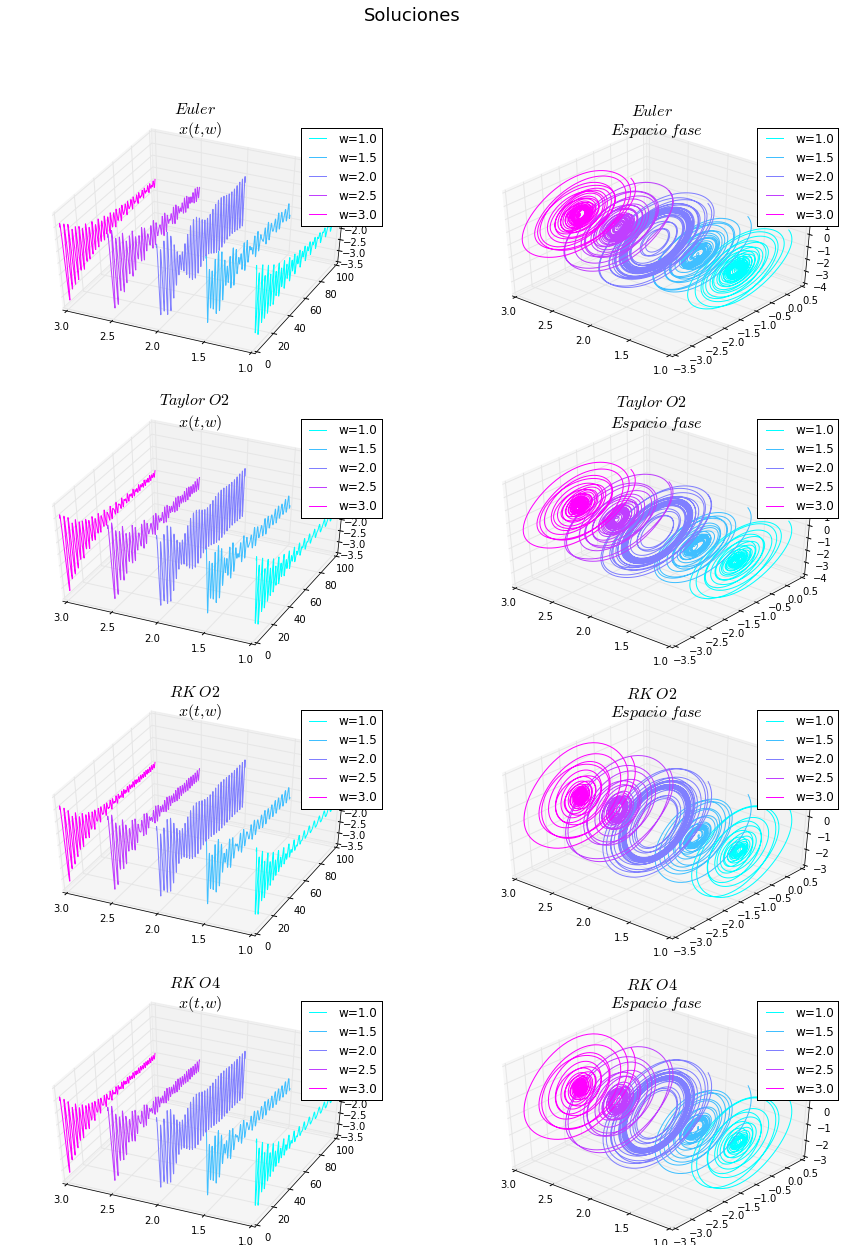

In [16]:
"""
fuente: http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
crédito: github.com/jeronimozc
"""

from mpl_toolkits.mplot3d import Axes3D
integradores = ["Euler","Taylor\ O2","RK\ O2","RK\ O4"]
x0=[0,1] #x=(x1,x2)
tlist=[0,100]
h=0.1

W=np.arange(1,3+.1,0.1)
soluciones = {w:[] for w in W} #crea una lista vacía para cada valor de w y las agrupa en un diccionario
for w in W: # Calculamos las soluciones con cada integrador para los distintos valores de w en W
    soluciones[w].append( arg_euler(foo,x0,tlist,w,h=0.1*h) )
    soluciones[w].append( arg_ord2(foo,jacfoo,x0,tlist,w,h=0.1*h) )
    soluciones[w].append( arg_rk2(foo,x0,tlist,w,h=0.5*h) )
    soluciones[w].append( arg_rk4(foo,x0,tlist,w,h=0.5*h) )

fig = plt.figure(figsize=(15,20))
fig.suptitle("Soluciones",fontsize=18)
from matplotlib import cm
x = cm.ScalarMappable(cmap="cool").to_rgba(range(len(W)))

for i in xrange(2,4*2+2,2): 
    # i numera los métodos (4 en total) pero lo duplicamos para graficar el espacio físico y el espacio fase
    ax1 = fig.add_subplot(4,2,i-1,projection="3d")#crea un arreglo de 4x2 subplots; el espacio físico es de indices nones
    ax1.set_title("${}\ $ \n $x(t,w)$".format(integradores[i/2-1]),fontsize=16)
    ax2 = fig.add_subplot(4,2,i,projection="3d") #en el arreglo de subplots el espacio fase se grafica en indices pares
    ax2.set_title("${}\ $ \n $Espacio\ fase\ $".format(integradores[i/2-1]),fontsize=16)
    
    for w in W[::5]: #graficar cada 5 entradas de W
        t,sol = soluciones[w][i/2-1] 
        w_arr = np.array([w]*len(t)) #crea un array de largo len(t) con todas sus entradas llenas de una misma w
        
        ax1.plot(w_arr,t,sol[:,0],c=x[list(W).index(w)],label="w={}".format(w)) #(x,y,z)=(w,t,x(t))
        ax2.plot(w_arr,sol[:,0],sol[:,1],c=x[list(W).index(w)],label="w={}".format(w)) #(x,y,z)=(w,x(t),x'(t))
        
        ax1.set_xlim(3,1),ax2.set_xlim(3,1)
        ax1.view_init(elev=45., azim=295.)
        ax2.view_init(elev=40., azim=310.)
        ax1.legend()
        ax2.legend()
plt.show()

Ahora, para apreciar mejor el comportamiento, escogeremos el método de Runge-Kutta de Orden 4 para realizar una gráfica de mayor tamaño que permita apreciar mejor el comportamiento de la solución en función de la frecuencia.

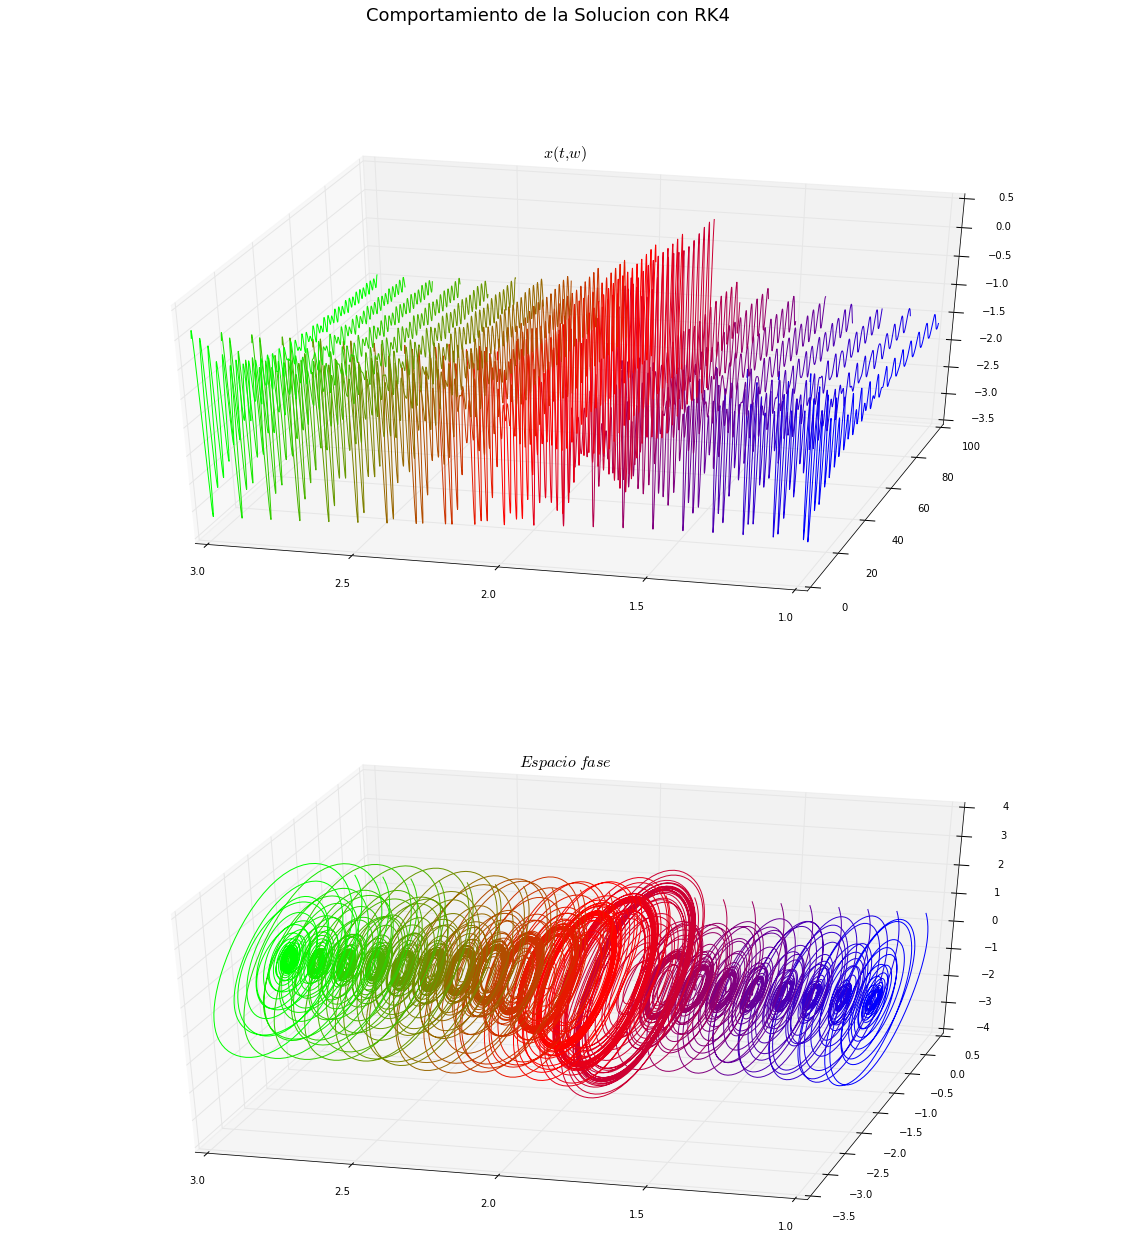

In [17]:
fig = plt.figure(figsize=(20,20))
fig.suptitle("Comportamiento de la Solucion con RK4",fontsize=18)
from matplotlib import cm
x = cm.ScalarMappable(cmap="brg").to_rgba(range(len(W)))

ax1 = fig.add_subplot(2,1,1,projection="3d")#crea un arreglo de 2x1 subplots donde el 1o es el espacio físico
ax1.set_title("$x(t,w)$".format(integradores[i/2-1]),fontsize=16)
ax2 = fig.add_subplot(2,1,2,projection="3d") #2o subplot es del espacio fase
ax2.set_title("$Espacio\ fase\ $".format(integradores[i/2-1]),fontsize=16)
    
for w in W: #graficar con todas las frecuencias
    t,sol = soluciones[w][3] 
    w_arr = np.array([w]*len(t)) #crea un array de largo len(t) con todas sus entradas llenas de una misma w
    
    ax1.plot(w_arr,t,sol[:,0],c=x[list(W).index(w)],label="w={}".format(w)) #(x,y,z)=(w,t,x(t))
    ax2.plot(w_arr,sol[:,0],sol[:,1],c=x[list(W).index(w)],label="w={}".format(w)) #(x,y,z)=(w,x(t),x'(t))
    
    ax1.set_xlim(3,1),ax2.set_xlim(3,1)
    ax1.view_init(elev=35., azim=285.)
    ax2.view_init(elev=35., azim=285.)
plt.show()

Se puede apreciar que hay un aumento repentino en la amplitud al llegar a $\omega=2$, por lo que parece ser que el sistema se presenta una resonancia.Finalmente, hacemos una comparación de los distintos métodos de integración para esta frecuencia.

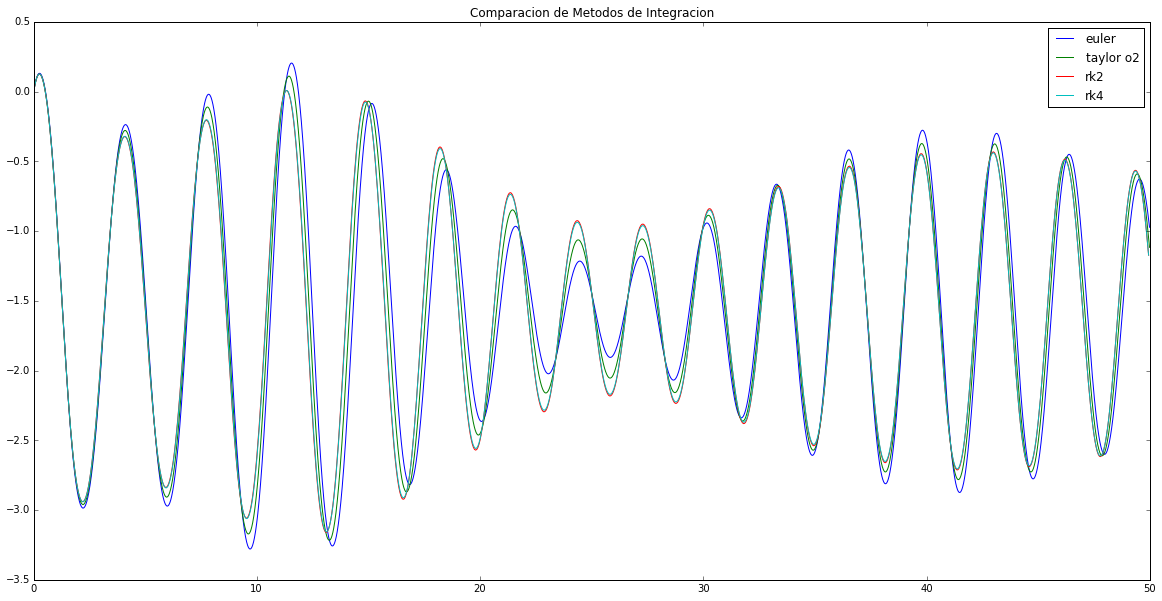

In [18]:
x0=[0,1] #x=(x1,x2)
tlist=[0,50]
w=2
h=0.1
t_eu,x_eu=arg_euler(foo,x0,tlist,w,0.1*h)
t_o2,x_o2=arg_ord2(foo,jacfoo,x0,tlist,w,0.1*h)
t_rk2,x_rk2=arg_rk2(foo,x0,tlist,w,0.5*h)
t_rk4,x_rk4=arg_rk4(foo,x0,tlist,w,0.5*h)

plt.figure(figsize=(20,10))
plt.plot(t_eu,x_eu[:,0],label="euler")
plt.plot(t_o2,x_o2[:,0],label="taylor o2")
plt.plot(t_rk2,x_rk2[:,0],label="rk2")
plt.plot(t_rk4,x_rk4[:,0],label="rk4")
plt.legend()
plt.title('Comparacion de Metodos de Integracion')
plt.show()

# Problema 4

Considere el siguiente sistema de ecuaciones diferenciales:
    
 $$\begin{array}{rcl} \frac{dx}{dt} & = & 10(y-x) \\ \frac{dy}{dt} & = & x(28-z)-y \\ \frac{dz}{dt} & = & xy-\frac{8}{3}z \end{array}$$
 
 Realize la integración del sistema de ecuaciones diferenciales con alguno de los métodos que se vieron anteriormente
 
a)Elija una condición inicial aleatoria en el $x,y,z \in [-5,5]$ y realize la gráfica de la solución en el plano $xy,xz,yz$ y comente sus observaciones.

b)Tome 3 soluciones parecidas, dadas por 3 condiciones inicales distintas separadas entre sí en $10^{-2}$. Explique lo que observa.

Para resolver la ecuación se requiere hallar $\vec{x(t)} \equiv (x(t),y(t),z(t))$. Ell sistema se puede escribir como $\dot{\vec{x}}(t)=\vec{L}(t,\vec{x}(t))$, con $\vec{L}=(10(x-y),x(28-z)-y,xy-\frac{8}{3}z)$.

Primero, definimos la función, la cual integraremos con el método de Runge-Kutta de 4o Orden.

In [50]:
def lorenz(t,x): #\vec{x}=[x,y,z]
    return np.array([10*(x[0]-x[1]),x[0]*(28.0-x[2])-x[1],x[0]*x[1]-8.0*x[2]/3.0])

**a)**Ahora escogeremos una condición inicial para $x,y,z$ en el intervalo $[-5,5]$ y graficaremos la solución.

In [70]:
x[:,(1,2)]

array([[-2.05946549, -0.78996539],
       [-1.92305064, -0.7971453 ],
       [-1.78483291, -0.80378852],
       [-1.64483666, -0.80986849],
       [-1.50308719, -0.81535875],
       [-1.35961075, -0.82023297],
       [-1.21443456, -0.82446499],
       [-1.06758678, -0.82802885],
       [-0.91909655, -0.83089884],
       [-0.76899395, -0.83304949]])

In [72]:
import random as rd

x0=[0,0,0]
tlist=[0,.01]
for i in xrange(0,3):
    x0[i]=rd.uniform(-5,5) #asigna un número flotante aleatorio entre -5,5

t,x=int_rk4(lorenz,x0,tlist,h=0.01)

fig.suptitle("Comportamiento de la Solucion con RK4",fontsize=18)
#plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax1.set_title("Plano xy $",fontsize=16)
ax2 = fig.add_subplot(2,2,2)
ax2.set_title("Plano xz $",fontsize=16)
ax3 = fig.add_subplot(2,2,3)
ax3.set_title("Plano yz $",fontsize=16)
ax4 = fig.add_subplot(2,2,4)
ax4.set_title("Sol Completa$",fontsize=16)

ax1.plot(x[:,0],x[:,1],label="Plano xy")
ax2.plot(x[:,0],x[:,2],label="Plano xz")
ax3.plot(x[:,1],x[:,2],label="Plano yz")
ax4.plot(x[:,0],x[:,1],x[:,2],c=x[list(W).index(w)],label="w={}".format(w)) #(x,y,z)=(w,t,x(t))


ax4.view_init(elev=35., azim=285.)
plt.legend()
plt.show()

ValueError: third arg must be a format string

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.suptitle("Comportamiento de la Solucion con RK4",fontsize=18)
from matplotlib import cm
x = cm.ScalarMappable(cmap="brg").to_rgba(range(len(W)))

ax1 = fig.add_subplot(2,1,1,projection="3d")#crea un arreglo de 2x1 subplots donde el 1o es el espacio físico
ax1.set_title("$x(t,w)$".format(integradores[i/2-1]),fontsize=16)
ax2 = fig.add_subplot(2,1,2,projection="3d") #2o subplot es del espacio fase
ax2.set_title("$Espacio\ fase\ $".format(integradores[i/2-1]),fontsize=16)
    
for w in W: #graficar con todas las frecuencias
    t,sol = soluciones[w][3] 
    w_arr = np.array([w]*len(t)) #crea un array de largo len(t) con todas sus entradas llenas de una misma w
    
    ax1.plot(w_arr,t,sol[:,0],c=x[list(W).index(w)],label="w={}".format(w)) #(x,y,z)=(w,t,x(t))
    ax2.plot(w_arr,sol[:,0],sol[:,1],c=x[list(W).index(w)],label="w={}".format(w)) #(x,y,z)=(w,x(t),x'(t))
    
    ax1.set_xlim(3,1),ax2.set_xlim(3,1)
    ax1.view_init(elev=35., azim=285.)
    ax2.view_init(elev=35., azim=285.)
plt.show()